In [103]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Json
import re
import json

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train & test data 
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
len(train)

3000

In [5]:
# View the test data (same columns as the training data)
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
len(test)

4398

In [7]:
# View the example submisison dataframe
sample_submission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [8]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


# Getting missing values

In [9]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


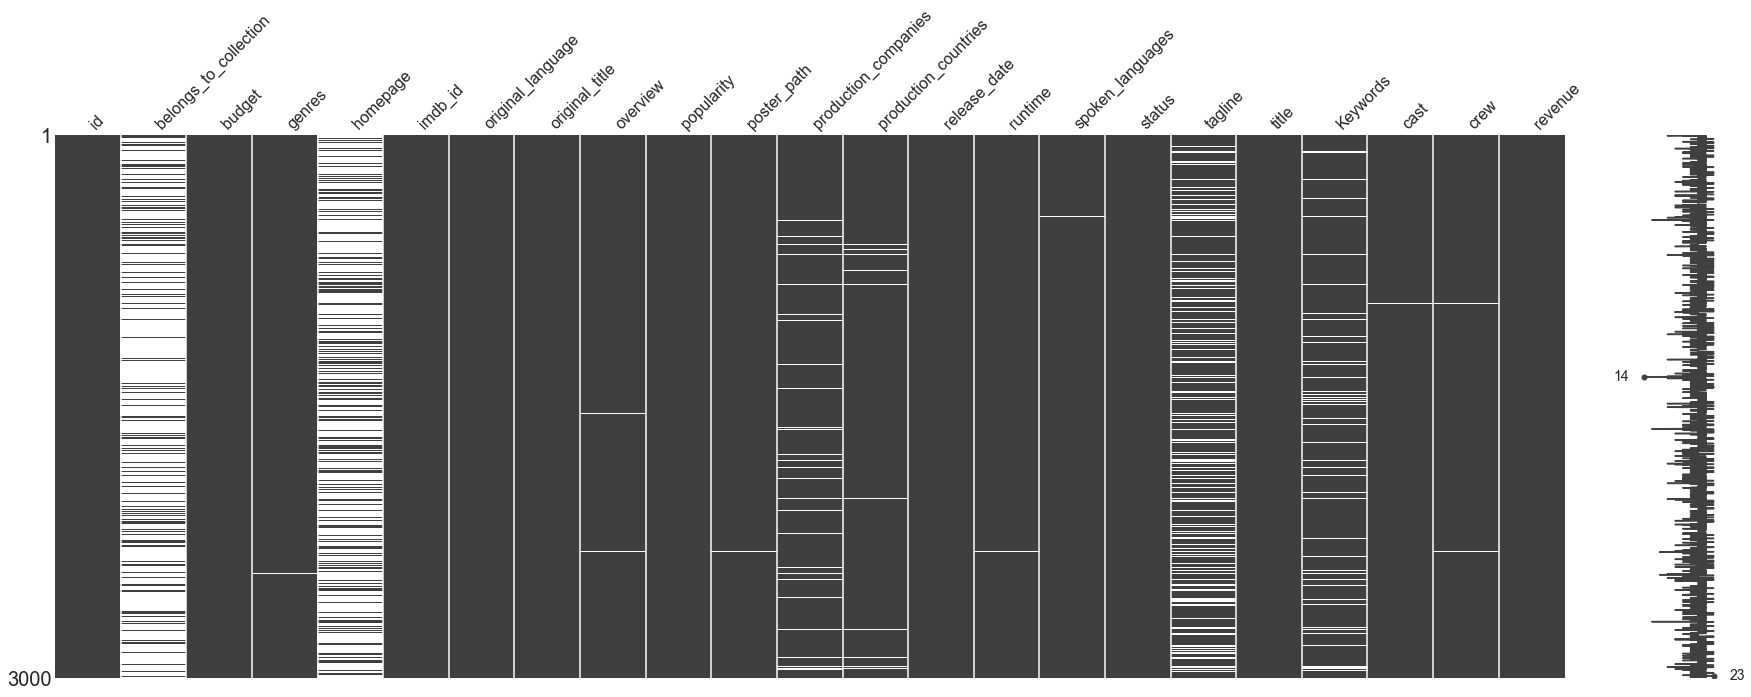

In [10]:
missingno.matrix(train, figsize=(30, 10))

## Get missing values

In [11]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [12]:
def find_missing_values(df, columns):
    missing_values = {}
    df_length = len(df)
    
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_length - total_column_values
    return missing_values 

In [13]:
missing_values = find_missing_values(train, train.columns)

In [14]:
missing_values

{'id': 0,
 'belongs_to_collection': 2396,
 'budget': 0,
 'genres': 7,
 'homepage': 2054,
 'imdb_id': 0,
 'original_language': 0,
 'original_title': 0,
 'overview': 8,
 'popularity': 0,
 'poster_path': 1,
 'production_companies': 156,
 'production_countries': 55,
 'release_date': 0,
 'runtime': 2,
 'spoken_languages': 20,
 'status': 0,
 'tagline': 597,
 'title': 0,
 'Keywords': 276,
 'cast': 13,
 'crew': 16,
 'revenue': 0}

## Cleaning data

In [15]:
len(train)

3000

In [16]:
train = train.dropna(subset=['poster_path'])
train = train.dropna(subset=['cast'])
train = train.dropna(subset=['spoken_languages'])
train = train.dropna(subset=['crew'])
train = train.dropna(subset=['genres'])
len(train)

2961

In [17]:
missing_values = find_missing_values(train, train.columns)
missing_values

{'id': 0,
 'belongs_to_collection': 2363,
 'budget': 0,
 'genres': 0,
 'homepage': 2025,
 'imdb_id': 0,
 'original_language': 0,
 'original_title': 0,
 'overview': 6,
 'popularity': 0,
 'poster_path': 0,
 'production_companies': 140,
 'production_countries': 44,
 'release_date': 0,
 'runtime': 0,
 'spoken_languages': 0,
 'status': 0,
 'tagline': 580,
 'title': 0,
 'Keywords': 261,
 'cast': 0,
 'crew': 0,
 'revenue': 0}

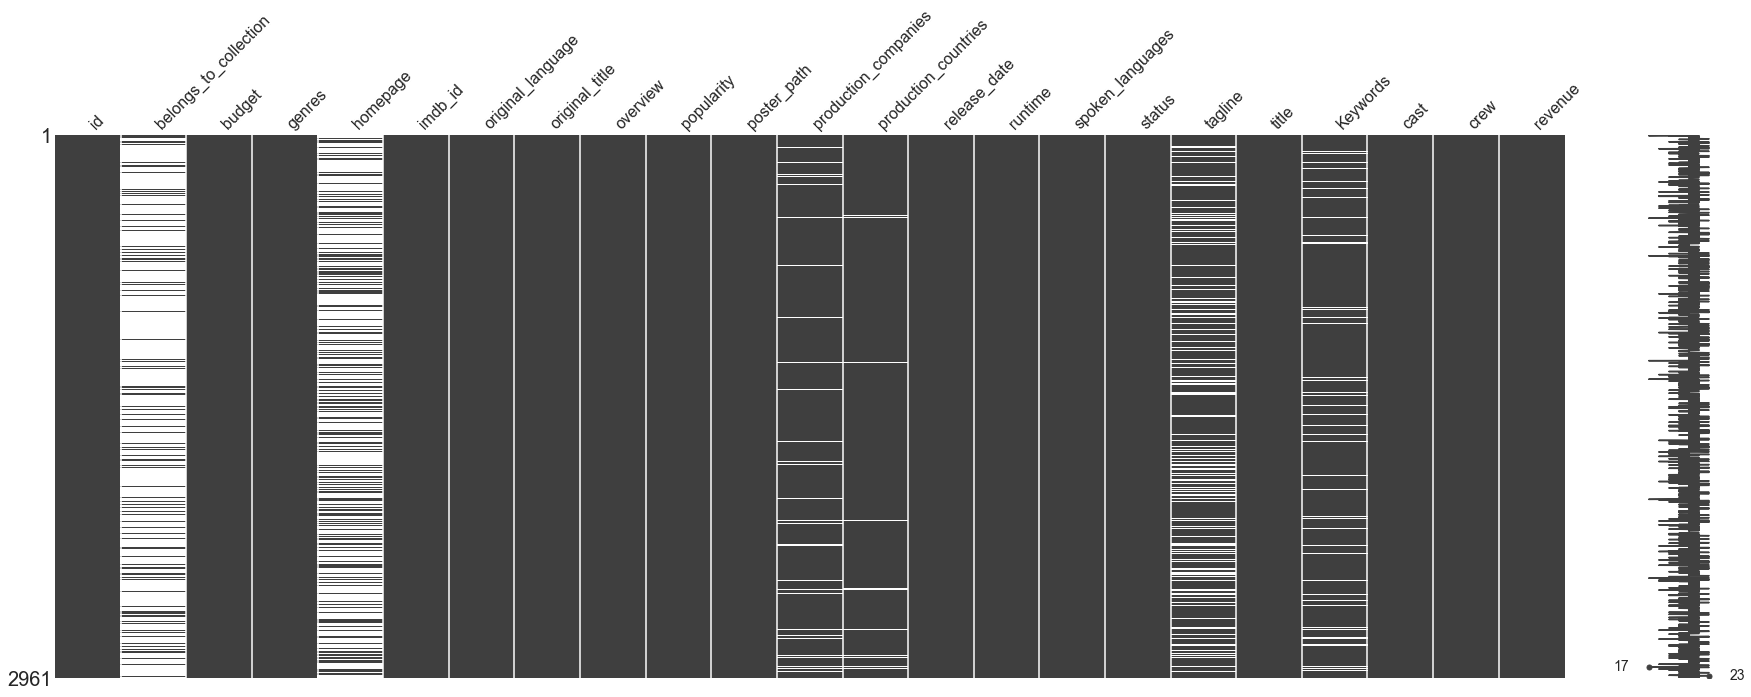

In [18]:
missingno.matrix(train, figsize=(30, 10))

## Analyze the data

In [19]:
df_con = pd.DataFrame() # for continuous variables

In [21]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [22]:
df_con["id"] = train["id"]

In [23]:
df_con.head()

,id
0,1
1,2
2,3
3,4
4,5


## Feature: revenue

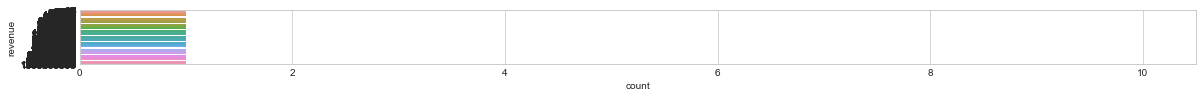

In [24]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="revenue", data=train)

In [25]:
# df_bin['Survived'] = train["Survived"]
df_con['revenue'] = train["revenue"]

In [26]:
df_con.head()

,id,revenue
0,1,12314651
1,2,95149435
2,3,13092000
3,4,16000000
4,5,3923970


## Feature: budget

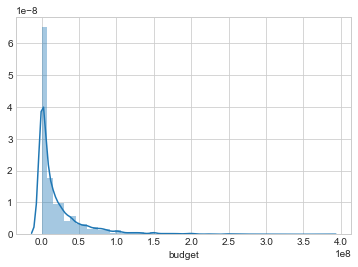

In [27]:
sns.distplot(train["budget"])

In [28]:
missing_values["budget"]

0

In [29]:
df_con["budget"] = train["budget"]

In [30]:
df_con.head()

,id,revenue,budget
0,1,12314651,14000000
1,2,95149435,40000000
2,3,13092000,3300000
3,4,16000000,1200000
4,5,3923970,0


## Feature : popularity

In [31]:
train.popularity.value_counts().sum()

2961

In [32]:
column = "popularity"
missing_values[column]

0

In [33]:
df_con[column] = train[column]

In [34]:
df_con.head()

,id,revenue,budget,popularity
0,1,12314651,14000000,6.575393
1,2,95149435,40000000,8.248895
2,3,13092000,3300000,64.299990
3,4,16000000,1200000,3.174936
4,5,3923970,0,1.148070


## Feature: genres

In [35]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [36]:
column = 'genres'

In [61]:
train[column].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [38]:
missing_values[column]

0

In [57]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres
0,1,12314651,14000000,6.575393,"[{'id': 35, 'name': 'Comedy'}]"
1,2,95149435,40000000,8.248895,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,3,13092000,3300000,64.299990,"[{'id': 18, 'name': 'Drama'}]"
3,4,16000000,1200000,3.174936,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,5,3923970,0,1.148070,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [63]:
def get_id(s):
    return re.findall(r'-?\d*\.?\d+', s)

In [64]:
get_id("[{'id': 35, 'name': 'Comedy'}]")

['35']

In [65]:
df_con[column] = df_con[column].apply(get_id)

In [66]:
df_con.head()

,id,revenue,budget,popularity,genres
0,1,12314651,14000000,6.575393,[35]
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]"
2,3,13092000,3300000,64.299990,[18]
3,4,16000000,1200000,3.174936,"[53, 18]"
4,5,3923970,0,1.148070,"[28, 53]"


# Feature: original_language

In [67]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [83]:
column = "original_language"

In [69]:
train[column].head()

0    en
1    en
2    en
3    hi
4    ko
Name: original_language, dtype: object

In [70]:
df_con[column] = train[column]

In [71]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language
0,1,12314651,14000000,6.575393,[35],en
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en
2,3,13092000,3300000,64.299990,[18],en
3,4,16000000,1200000,3.174936,"[53, 18]",hi
4,5,3923970,0,1.148070,"[28, 53]",ko


In [84]:
df_con[column].value_counts()

en    2542
fr      77
ru      44
es      43
hi      42
ja      37
it      23
ko      20
cn      20
zh      19
de      17
ta      16
sv       8
pt       6
nl       6
da       5
fa       5
ro       4
hu       3
tr       3
te       2
ml       2
no       2
fi       2
pl       2
sr       1
el       1
he       1
cs       1
ar       1
vi       1
nb       1
ur       1
id       1
bn       1
mr       1
Name: original_language, dtype: int64

## Featur: original_title

In [72]:
column = "original_title"

In [73]:
train[column].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                        마린보이
Name: original_title, dtype: object

In [75]:
df_con[column] = train[column].str.len()

In [76]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title
0,1,12314651,14000000,6.575393,[35],en,22
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40
2,3,13092000,3300000,64.299990,[18],en,8
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7
4,5,3923970,0,1.148070,"[28, 53]",ko,4


## Feature: overview

In [77]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [142]:
column = "overview"

In [143]:
train[column].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: overview, dtype: object

In [149]:
df_con[column] = train[column].astype(str)
df_con[column] = df_con[column].str.len()

In [150]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118


## Feature: production_companies

In [92]:
column = "production_companies"

In [93]:
missing_values[column]

140

In [94]:
train[column].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [95]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")

In [96]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies
0,1,12314651,14000000,6.575393,[35],en,22,155.0,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393.0,1,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
2,3,13092000,3300000,64.299990,[18],en,8,130.0,1,"[{'name': 'Bold Films', 'id': 2266}, {'name': ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581.0,1,
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168.0,1,


In [97]:
df_con[column] = df_con[column].apply(get_id)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies
0,1,12314651,14000000,6.575393,[35],en,22,155.0,1,"[4, 60, 8411]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393.0,1,[2]
2,3,13092000,3300000,64.299990,[18],en,8,130.0,1,"[2266, 3172, 32157]"
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581.0,1,[]
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168.0,1,[]


## Feature : production_countries

In [98]:
column = "production_countries"

In [99]:
train[column].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

In [113]:
missing_values[column]

44

In [ ]:
def get_column_values(s, col):
    s = s.replace("[", "").replace("]", "").replace("{", "").replace("}", "")
    arr = s.split(",")
    c = list(filter(lambda x: x.strip().startswith(f"'{col}'"), arr))
    return [ i.split(":")[1].strip() for i in c]

In [118]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries
0,1,12314651,14000000,6.575393,[35],en,22,155.0,1,"[4, 60, 8411]","[{'iso_3166_1': 'US', 'name': 'United States o..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393.0,1,[2],"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,3,13092000,3300000,64.299990,[18],en,8,130.0,1,"[2266, 3172, 32157]","[{'iso_3166_1': 'US', 'name': 'United States o..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581.0,1,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168.0,1,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]"


In [119]:
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'iso_3166_1'))

In [120]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries
0,1,12314651,14000000,6.575393,[35],en,22,155.0,1,"[4, 60, 8411]",[US]
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393.0,1,[2],[US]
2,3,13092000,3300000,64.299990,[18],en,8,130.0,1,"[2266, 3172, 32157]",[US]
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581.0,1,[],[IN]
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168.0,1,[],[KR]


## Feature: release_date

In [121]:
column = "release_date"

In [122]:
train[column].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [123]:
missing_values[column]

0

In [133]:
df_con[column] = train[column]

In [134]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date
0,1,12314651,14000000,6.575393,[35],en,22,155.0,1,"[4, 60, 8411]",[US],2/20/15
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393.0,1,[2],[US],8/6/04
2,3,13092000,3300000,64.299990,[18],en,8,130.0,1,"[2266, 3172, 32157]",[US],10/10/14
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581.0,1,[],[IN],3/9/12
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168.0,1,[],[KR],2/5/09


In [135]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## feature : runtime

In [151]:
column = "runtime"

In [152]:
train[column].head()

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
Name: runtime, dtype: float64

In [153]:
missing_values[column]

0

In [154]:
df_con[column] = train[column].astype(int)

In [155]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118


## feature: spoken_languages

In [156]:
column = "spoken_languages"

In [157]:
train[column].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

In [158]:
missing_values[column]

0

In [162]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,"[{'iso_639_1': 'en', 'name': 'English'}]"
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]"


In [163]:
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'iso_639_1'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en]
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en]
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en]
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko]


## Feature: status

In [164]:
column = "status"

In [165]:
train[column].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [166]:
missing_values[column]

0

In [167]:
train[column].value_counts()

Released    2957
Rumored        4
Name: status, dtype: int64

In [169]:
df_con[column] = train[column]
df_con[column] = np.where(df_con[column] == "Released", 0, 1)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0


## Feature : tagline

In [171]:
column = "tagline"

In [172]:
train[column].head()

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

In [173]:
missing_values[column]

580

In [175]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,The Laws of Space and Time are About to be Vio...
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,It can take a lifetime to find true love; she'...
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,The road to greatness can take you to the edge.
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,NaN
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,NaN


In [177]:
df_con[column] = df_con[column].fillna("")
df_con[column] = df_con[column].str.len()
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0


## Feature: title

In [178]:
column = "title"

In [180]:
train[column].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                  Marine Boy
Name: title, dtype: object

In [181]:
missing_values[column]

0

In [183]:
df_con[column] = train[column]
df_con[column] = df_con[column].str.len()
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52,22
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60,40
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47,8
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0,7
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0,10


In [185]:
df_con["title_discrepancy"] = df_con["original_title"] - df_con["title"]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52,22,0
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60,40,0
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47,8,0
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0,7,0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0,10,-6


In [187]:
df_con["title_discrepancy"].value_counts().head()

 0    2642
-2      41
-1      28
 1      26
 2      21
Name: title_discrepancy, dtype: int64

## Feature: Keywords

In [188]:
column = "Keywords"

In [190]:
train[column].head()

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                  NaN
Name: Keywords, dtype: object

In [191]:
missing_values[column]

261

In [194]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52,22,0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60,40,0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42..."
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47,8,0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0,7,0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0,10,-6,


In [200]:
df_con[column] = df_con[column].apply(get_id)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52,22,0,"[4379, 9663, 11830, 179431]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60,40,0,"[2505, 4263, 6038, 13072]"
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0,10,-6,[]


## Feature: cast

In [201]:
column = "cast"

In [202]:
train[column].head()

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

In [203]:
missing_values[column]

0

In [219]:
df_con[column] = train[column]
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'id'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords,cast
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",[US],2/20/15,93,[en],0,52,22,0,"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],[US],8/6/04,113,[en],0,60,40,0,"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1..."
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",[US],10/10/14,105,[en],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],[IN],3/9/12,122,"[en, hi]",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],[KR],2/5/09,118,[ko],0,0,10,-6,[],"[84751, 64453, 84752, 1130534]"


In [220]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# Feature: crew

In [221]:
column = "crew"

In [222]:
train[column].head()

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [223]:
missing_values[column]

0

In [224]:
df_con[column] = train[column]
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'id'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,...,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords,cast,crew
0,1,12314651,14000000,6.575393,[35],en,22,155,1,"[4, 60, 8411]",...,2/20/15,93,[en],0,52,22,0,"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115...","[1449071, 3227, 347335, 347335, 57822, 1451395..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,1,[2],...,8/6/04,113,[en],0,60,40,0,"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...","[1201, 1214, 4500, 8851, 12970, 38415, 38416, ..."
2,3,13092000,3300000,64.299990,[18],en,8,130,1,"[2266, 3172, 32157]",...,10/10/14,105,[en],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366...","[494, 6745, 9250, 23783, 23786, 53181, 52443, ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,1,[],...,3/9/12,122,"[en, hi]",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,...","[95510, 95510, 95510]"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,1,[],...,2/5/09,118,[ko],0,0,10,-6,[],"[84751, 64453, 84752, 1130534]","[84749, 84749]"


## Feature engineering

In [225]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,poster_path,production_companies,...,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords,cast,crew
0,0,1225,255,1277,614,7,21,103,0,1406,...,864,33,85,0,48,21,30,1539,2026,535
1,1,2244,307,1700,644,7,39,341,0,513,...,2080,53,85,0,56,39,30,910,812,257
2,2,1245,154,2950,277,7,7,78,0,659,...,188,45,85,0,43,7,30,318,2942,1894
3,3,1332,103,614,721,13,6,508,0,0,...,1157,62,173,0,0,6,30,25,1579,2904
4,4,831,0,247,573,18,3,116,0,0,...,920,58,335,0,0,9,24,0,2691,2720


# Machine Learning Models

In [226]:
selected_df = df_con_enc
X_train = selected_df.drop("revenue", axis=1)
Y_train = selected_df["revenue"]

# Define a function to fit machine learning algorithms

In [229]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    start_time = time.time()
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    log_time = (time.time() - start_time)
    exec_time = datetime.timedelta(seconds=log_time)
    
    return train_pred, acc, acc_cv, exec_time

## Logistic Regression

In [ ]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log, exec_time = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % exec_time)

## K-Nearest Neighbours

In [ ]:
# k-Nearest Neighbours
train_pred_knn, acc_knn, acc_cv_knn, exec_time = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % exec_time)